In [7]:
from mvlearn.datasets.GaussianMixture import GaussianMixture
from mvlearn.cluster.mv_k_means import MultiviewKMeans

In [2]:
import numpy as np
from scipy.stats import ortho_group
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
## Training
n = 100
mu = [0,1]
sigma = np.eye(2)
seed = 1
two_class = True
GM = GaussianMixture(n,seed,mu,sigma,two_class=two_class)

GM.sample_views(transform='poly', n_noise=3)

train_Xs = GM.Xs
train_y = GM.y

In [36]:
## Testing
n = 100
mu = [0,1]
sigma = np.eye(2)
seed = 2
two_class = True
GM = GaussianMixture(n,seed,mu,sigma,two_class=two_class)

GM.sample_views(transform='', n_noise=3)

test_Xs = GM.Xs
test_y = GM.y

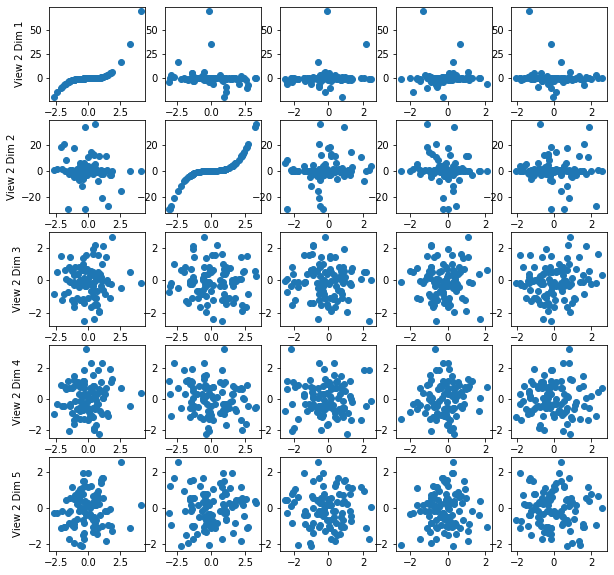

In [31]:
fig, axes = GM.plot_2views()
plt.show()

In [37]:
clf = MultiviewKMeans(n_clusters=2)

In [38]:
clf.fit(train_Xs)

MultiviewKMeans(max_iter=None, n_clusters=2, n_init=5, patience=5,
                random_state=None)

In [39]:
yhat_train = clf.predict(train_Xs)
yhat_test = clf.predict(test_Xs)

In [40]:
print(f'Train Error: {sum(np.abs(yhat_train - train_y)) / len(train_y)}')
print(f'Test Error: {sum(np.abs(yhat_test - test_y)) / len(test_y)}')

Train Error: 0.65
Test Error: 0.5
